# 1D regression 
- Statistical comparison

In [75]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from QCLRegressor.testing.OneDimDataset import prepare_dataset,eval

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

from QCLRegressor.regressors.StandardQCLRegressor import StandardQCLRegressor
from QCLRegressor.gates.CNOTRotationGates import CNOTRotationGates
from QCLRegressor.Encoders.XYEncoder import XYEncoder
from QCLRegressor.Encoders.prerocess import *
from QCLRegressor.gates.Observable import ZObservable
from QCLRegressor.testing.DNNModel import DNNModel

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:

from sklearn.metrics import mean_squared_error
def eval_model(model,tr_X,tr_y,te_inner_X,te_inner_y,te_low_X,te_low_y,te_high_X,te_high_y):

    model.fit(tr_X,tr_y)

    #extrapolating regions
    out_X=[]
    out_X.append(te_low_X)
    out_X.append(te_high_X)
    out_X=np.array(out_X).reshape(-1,1)

    out_y=[]
    out_y.append(te_low_y)
    out_y.append(te_high_y)
    out_y=np.array(out_y).reshape(-1)

    out_pred_y=model.predict(out_X)
    out_error=mean_squared_error(out_pred_y,out_y)


    #inner regions
    inner_pred_y=model.predict(te_inner_X)
    inner_error=mean_squared_error(inner_pred_y,te_inner_y)

    return out_error,inner_error

In [77]:
from sklearn.linear_model import BayesianRidge

class PolynominalBYR:
    def __init__(self,degree=1):
        self.degree=degree+1
        self.model=BayesianRidge()

    def fit(self,X,y):

        self.model.fit(np.vander(X.reshape(-1), self.degree), y)
        return self

    def predict(self,X):
        return self.model.predict(np.vander(X.reshape(-1),self.degree))

In [78]:
import warnings
warnings.simplefilter('ignore')
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel,RBF
from sklearn.ensemble import RandomForestRegressor
import time
import json

x_dim,n_qubit,depth=1,2,3


#model definition
model_dict={}
model_dict["SVR(RBF)"]=SVR()
model_dict["SVR(RBF) g=0.1"]=SVR(gamma=0.1)
model_dict["SVR(RBF) g=1"]=SVR(gamma=1)
model_dict["SVR(RBF) g=10"]=SVR(gamma=10)
model_dict["SVR(RBF) g=100"]=SVR(gamma=100)
model_dict["RFR"]=RandomForestRegressor()
model_dict["RFR depth=3"]=RandomForestRegressor(max_depth=3)
model_dict["RFR depth=5"]=RandomForestRegressor(max_depth=5)
model_dict["RFR depth=10"]=RandomForestRegressor(max_depth=10)
model_dict["BYR degree=1"]=PolynominalBYR()
model_dict["BYR degree=2"]=PolynominalBYR(degree=2)
model_dict["BYR degree=3"]=PolynominalBYR(degree=3)
model_dict["BYR degree=4"]=PolynominalBYR(degree=4)



In [79]:
model_dict["GPR(RBF)"]=GaussianProcessRegressor(kernel=RBF() + WhiteKernel())
model_dict["GPR(DOT)"]=GaussianProcessRegressor(kernel=DotProduct() + WhiteKernel())
model_dict["GPR(RBF+Dot)"]=GaussianProcessRegressor(kernel=RBF()+ DotProduct() + WhiteKernel())

model_dict["MLP-16(relu) l=1"]=DNNModel(hidden_dim=16,layers=1,activation="relu")
model_dict["MLP-16(relu) l=2"]=DNNModel(hidden_dim=16,layers=2,activation="relu")
model_dict["MLP-16(relu) l=3"]=DNNModel(hidden_dim=16,layers=3,activation="relu")
model_dict["MLP-16(relu) l=4"]=DNNModel(hidden_dim=16,layers=4,activation="relu")
model_dict["MLP-16(tanh) l=1"]=DNNModel(hidden_dim=16,layers=1,activation="tanh")
model_dict["MLP-16(tanh) l=2"]=DNNModel(hidden_dim=16,layers=2,activation="tanh")
model_dict["MLP-16(tanh) l=3"]=DNNModel(hidden_dim=16,layers=3,activation="tanh")
model_dict["MLP-16(tanh) l=4"]=DNNModel(hidden_dim=16,layers=4,activation="tanh")
model_dict["MLP-16(sigmoid) l=1"]=DNNModel(hidden_dim=16,layers=1,activation="sigmoid")
model_dict["MLP-16(sigmoid) l=2"]=DNNModel(hidden_dim=16,layers=2,activation="sigmoid")
model_dict["MLP-16(sigmoid) l=3"]=DNNModel(hidden_dim=16,layers=3,activation="sigmoid")
model_dict["MLP-16(sigmoid) l=4"]=DNNModel(hidden_dim=16,layers=4,activation="sigmoid")

model_dict["QCL"]=StandardQCLRegressor(x_dim=x_dim,n_qubit=n_qubit,encoder=XYEncoder(n_qubit),observable=ZObservable(n_qubit=n_qubit,coeff=3),vqe_gates=CNOTRotationGates(n_qubit=n_qubit,depth=depth))

  0%|          | 0/30 [00:00<?, ?it/s]

1/1 [==============================] - 0s 11ms/step
loss 0.000000452183493
1/1 [==============================] - 0s 10ms/step
loss 0.000001592578402
1/1 [==============================] - 0s 11ms/step


  3%|▎         | 1/30 [01:00<29:14, 60.51s/it]

loss 0.000000757339005
1/1 [==============================] - 0s 10ms/step
loss 0.000000534338110
1/1 [==============================] - 0s 11ms/step
loss 0.000002594699198
1/1 [==============================] - 0s 10ms/step


  7%|▋         | 2/30 [01:55<26:43, 57.25s/it]

loss 0.000003164579352
1/1 [==============================] - 0s 10ms/step
loss 0.000000863974211
1/1 [==============================] - 0s 9ms/step
loss 0.000000044218209
1/1 [==============================] - 0s 11ms/step


 10%|█         | 3/30 [02:51<25:28, 56.60s/it]

loss 0.000000928101528
1/1 [==============================] - 0s 10ms/step
loss 0.000012166047698
1/1 [==============================] - 0s 9ms/step
loss 0.000000934989402
1/1 [==============================] - 0s 11ms/step


 13%|█▎        | 4/30 [03:46<24:20, 56.19s/it]

loss 0.000000045622869
1/1 [==============================] - 0s 10ms/step
loss 0.000001125974692
1/1 [==============================] - 0s 10ms/step
loss 0.000000336426110
1/1 [==============================] - 0s 9ms/step


 17%|█▋        | 5/30 [04:42<23:20, 56.01s/it]

loss 0.000000432084893
1/1 [==============================] - 0s 11ms/step
loss 0.000000411837339
1/1 [==============================] - 0s 10ms/step
loss 0.000005914501058
1/1 [==============================] - 0s 9ms/step


 20%|██        | 6/30 [05:37<22:16, 55.69s/it]

loss 0.000002981552912
1/1 [==============================] - 0s 12ms/step
loss 0.000000875822688
1/1 [==============================] - 0s 10ms/step
loss 0.000000158676551
1/1 [==============================] - 0s 10ms/step


 23%|██▎       | 7/30 [06:33<21:24, 55.87s/it]

loss 0.000000718326640
1/1 [==============================] - 0s 9ms/step
loss 0.000000807245821
1/1 [==============================] - 0s 12ms/step
loss 0.000004252505857
1/1 [==============================] - 0s 10ms/step


 27%|██▋       | 8/30 [07:29<20:25, 55.71s/it]

loss 0.000000264601516
1/1 [==============================] - 0s 10ms/step
loss 0.000002030995425
1/1 [==============================] - 0s 14ms/step
loss 0.000001281971498
1/1 [==============================] - 0s 10ms/step
loss 0.000001103291237


 30%|███       | 9/30 [08:26<19:40, 56.21s/it]

1/1 [==============================] - 0s 10ms/step
loss 0.000000040095226
1/1 [==============================] - 0s 9ms/step
loss 0.000001702391416
1/1 [==============================] - 0s 12ms/step


 33%|███▎      | 10/30 [09:22<18:40, 56.00s/it]

loss 0.000000482877141
1/1 [==============================] - 0s 10ms/step
loss 0.000000179485987
1/1 [==============================] - 0s 9ms/step
loss 0.000000012884636
1/1 [==============================] - 0s 11ms/step


 37%|███▋      | 11/30 [10:17<17:40, 55.82s/it]

loss 0.000005445124328
1/1 [==============================] - 0s 11ms/step
loss 0.000000207709838
1/1 [==============================] - 0s 10ms/step
loss 0.000003017688823
1/1 [==============================] - 0s 10ms/step


 40%|████      | 12/30 [11:12<16:37, 55.43s/it]

loss 0.000000067670257
1/1 [==============================] - 0s 11ms/step
loss 0.000001101505428
1/1 [==============================] - 0s 10ms/step
loss 0.000000051865473
1/1 [==============================] - 0s 16ms/step


 43%|████▎     | 13/30 [12:09<15:52, 56.02s/it]

loss 0.000000331534119
1/1 [==============================] - 0s 11ms/step
loss 0.000000043107307
1/1 [==============================] - 0s 11ms/step
loss 0.000000589733604
1/1 [==============================] - 0s 10ms/step


 47%|████▋     | 14/30 [13:05<14:54, 55.90s/it]

loss 0.000000130313881
1/1 [==============================] - 0s 10ms/step
loss 0.000002716238291
1/1 [==============================] - 0s 11ms/step
loss 0.000000197125289
1/1 [==============================] - 0s 10ms/step


 50%|█████     | 15/30 [14:01<14:00, 56.03s/it]

loss 0.000000108907853
1/1 [==============================] - 0s 10ms/step
loss 0.000000679200175
1/1 [==============================] - 0s 12ms/step
loss 0.000000018274433
1/1 [==============================] - 0s 11ms/step


 53%|█████▎    | 16/30 [14:58<13:08, 56.33s/it]

loss 0.000000069747062
1/1 [==============================] - 0s 10ms/step
loss 0.000000295978134
1/1 [==============================] - 0s 9ms/step
loss 0.000000117576485
1/1 [==============================] - 0s 11ms/step


 57%|█████▋    | 17/30 [15:55<12:14, 56.48s/it]

loss 0.000000455497427
1/1 [==============================] - 0s 10ms/step
loss 0.000002056516141
1/1 [==============================] - 0s 10ms/step
loss 0.000001813802721
1/1 [==============================] - 0s 12ms/step
loss 0.000002599454538

 60%|██████    | 18/30 [16:50<11:13, 56.11s/it]


1/1 [==============================] - 0s 12ms/step
loss 0.000001075530772
1/1 [==============================] - 0s 10ms/step
loss 0.000002412649741
1/1 [==============================] - 0s 10ms/step


 63%|██████▎   | 19/30 [17:45<10:14, 55.89s/it]

loss 0.000002582628957
1/1 [==============================] - 0s 11ms/step
loss 0.000000020310303
1/1 [==============================] - 0s 10ms/step
loss 0.000000006671845
1/1 [==============================] - 0s 10ms/step


 67%|██████▋   | 20/30 [18:42<09:22, 56.25s/it]

loss 0.000000137158863
1/1 [==============================] - 0s 12ms/step
loss 0.000000011867516
1/1 [==============================] - 0s 12ms/step
loss 0.000000002719251
1/1 [==============================] - 0s 10ms/step


 70%|███████   | 21/30 [19:39<08:27, 56.43s/it]

loss 0.000000079810234
1/1 [==============================] - 0s 10ms/step
loss 0.000001835559130
1/1 [==============================] - 0s 12ms/step
loss 0.000000567851463
1/1 [==============================] - 0s 11ms/step


 73%|███████▎  | 22/30 [20:36<07:32, 56.62s/it]

loss 0.000000831743005
1/1 [==============================] - 0s 9ms/step
loss 0.000000294046668
1/1 [==============================] - 0s 10ms/step
loss 0.000002726623886
1/1 [==============================] - 0s 11ms/step


 77%|███████▋  | 23/30 [21:34<06:39, 57.01s/it]

loss 0.000000349651559
1/1 [==============================] - 0s 10ms/step
loss 0.000000182226416
1/1 [==============================] - 0s 10ms/step
loss 0.000000067074835
1/1 [==============================] - 0s 11ms/step


 80%|████████  | 24/30 [22:32<05:44, 57.37s/it]

loss 0.000000000963238
1/1 [==============================] - 0s 11ms/step
loss 0.000000759967139
1/1 [==============================] - 0s 10ms/step
loss 0.000000253103599
1/1 [==============================] - 0s 9ms/step


 83%|████████▎ | 25/30 [23:28<04:44, 56.88s/it]

loss 0.000000028619196
1/1 [==============================] - 0s 12ms/step
loss 0.000006197259650
1/1 [==============================] - 0s 13ms/step
loss 0.000000992789895
1/1 [==============================] - 0s 10ms/step


 87%|████████▋ | 26/30 [24:27<03:50, 57.53s/it]

loss 0.000000525009146
1/1 [==============================] - 0s 12ms/step
loss 0.000000221625367
1/1 [==============================] - 0s 13ms/step
loss 0.000000019680196
1/1 [==============================] - 0s 10ms/step


 90%|█████████ | 27/30 [25:28<02:55, 58.46s/it]

loss 0.000000527276704
1/1 [==============================] - 0s 10ms/step
loss 0.000000113332031
1/1 [==============================] - 0s 12ms/step
loss 0.000005311178428
1/1 [==============================] - 0s 12ms/step
loss 0.000001198626027


 93%|█████████▎| 28/30 [26:27<01:57, 58.54s/it]

1/1 [==============================] - 0s 10ms/step
loss 0.000000276280920
1/1 [==============================] - 0s 12ms/step
loss 0.000000401116339
1/1 [==============================] - 0s 12ms/step


 97%|█████████▋| 29/30 [27:23<00:58, 58.04s/it]

loss 0.000000107260539
1/1 [==============================] - 0s 10ms/step
loss 0.000000202550762
1/1 [==============================] - 0s 10ms/step
loss 0.000002606062075
1/1 [==============================] - 0s 11ms/step


100%|██████████| 30/30 [28:20<00:00, 56.68s/it]

loss 0.000001855349795


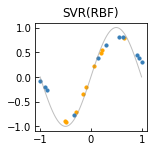

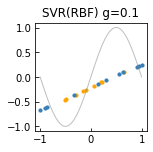

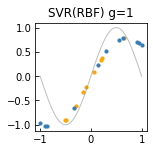

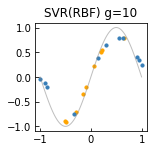

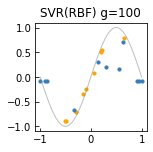

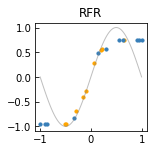

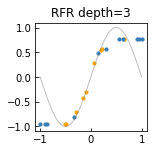

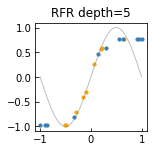

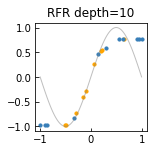

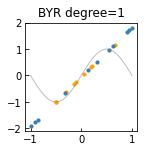

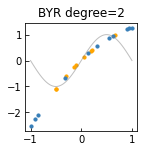

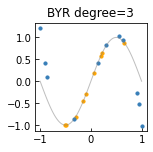

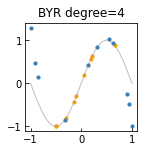

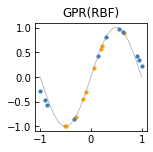

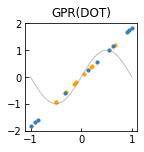

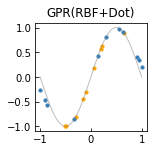

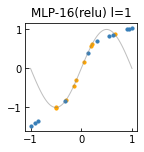

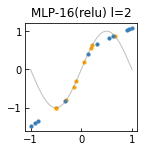

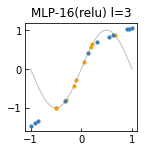

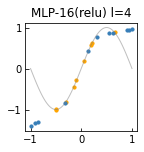

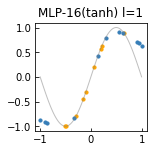

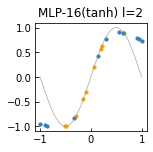

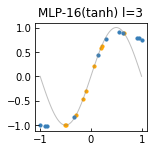

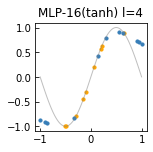

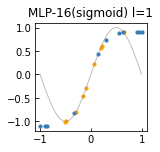

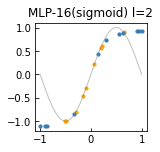

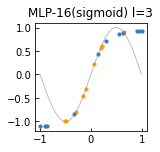

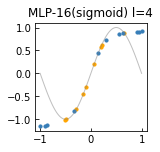

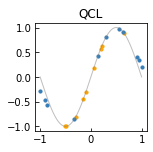

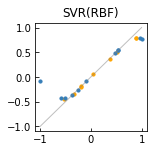

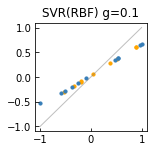

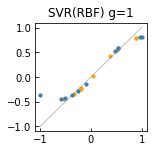

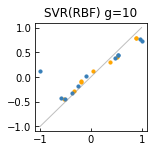

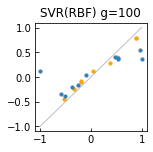

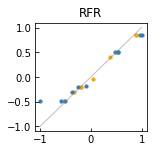

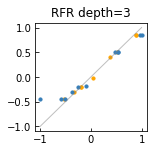

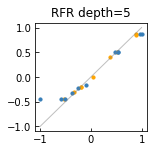

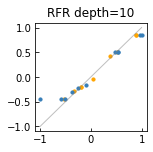

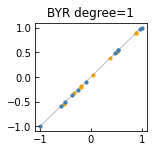

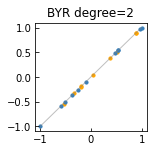

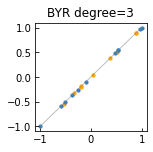

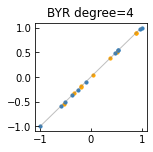

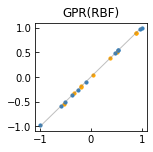

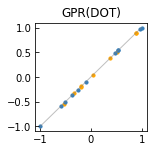

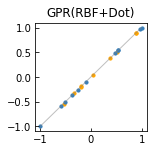

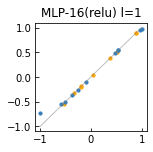

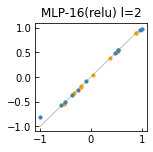

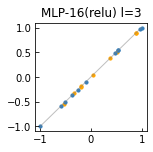

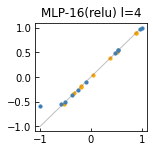

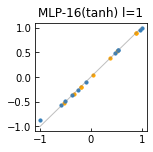

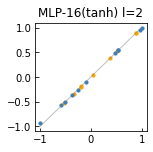

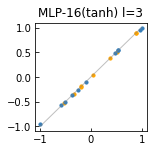

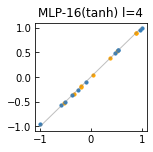

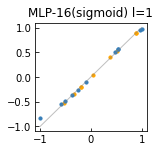

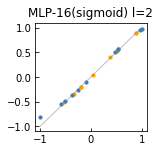

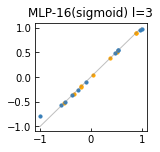

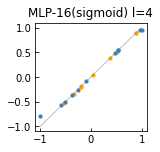

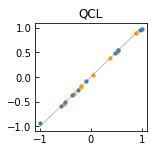

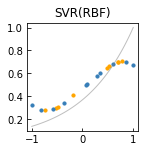

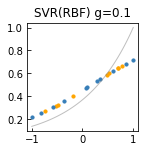

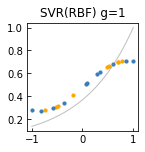

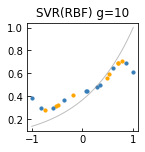

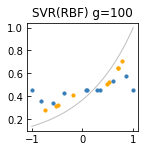

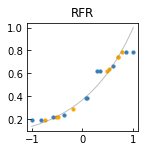

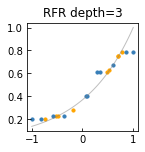

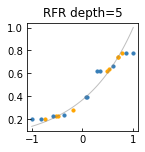

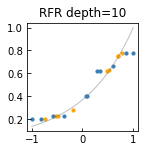

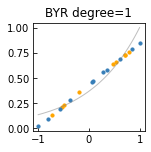

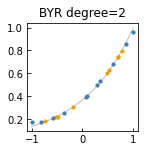

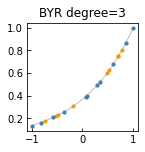

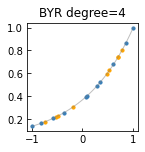

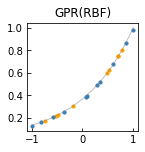

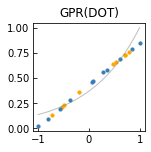

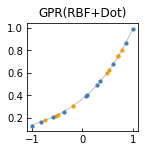

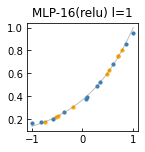

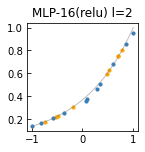

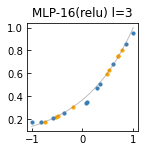

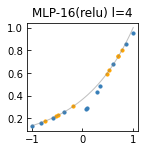

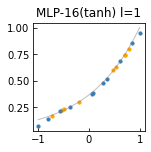

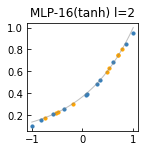

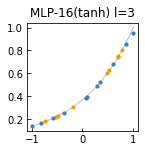

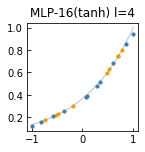

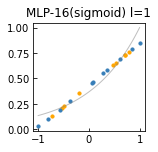

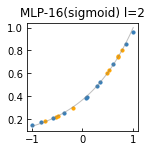

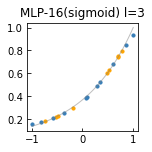

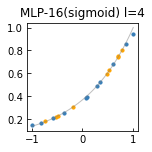

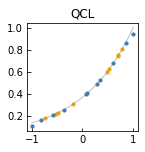

In [80]:
from tqdm import tqdm

current_time=time.strftime('%Y-%m-%d %H:%M:%S')
path=f"res/1d/reg{current_time}.json"

res_dict={}
count=0
for i in tqdm(range(30)):
#for i in tqdm(range(1)):
    #dataset
    for mode in ["sin","linear","exp"]:
        tr_X,tr_y,te_inner_X,te_inner_y,te_low_X,te_low_y,te_high_X,te_high_y,act_X,act_y=prepare_dataset(n_all_record=20,mode=mode,plot=False)

        #model
        for model_name,model in model_dict.items():
            out_error,inner_error=eval_model(model,tr_X,tr_y,te_inner_X,te_inner_y,te_low_X,te_low_y,te_high_X,te_high_y)

            temp_dict={}
            temp_dict["Model"]=model_name
            temp_dict["Extra"]=out_error
            temp_dict["Inner"]=inner_error
            temp_dict["Mode"]=mode

            res_dict[count]=temp_dict
            count+=1

            #plot
            if i==0:
                plt.figure(figsize=(2,2))
                ax = plt.subplot()
                eval(ax,model,tr_X,tr_y,te_inner_X,te_inner_y,te_low_X,te_low_y,te_high_X,te_high_y,act_X,act_y,title=model_name)
    

    with open(path,"w") as f:
        f.write(json.dumps(res_dict)) 

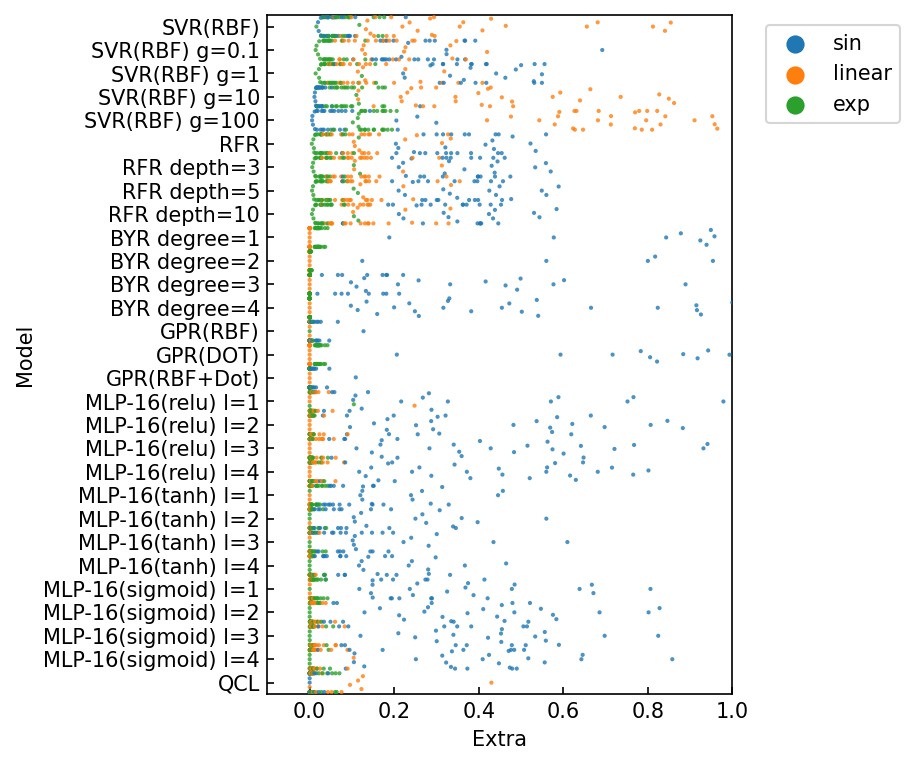

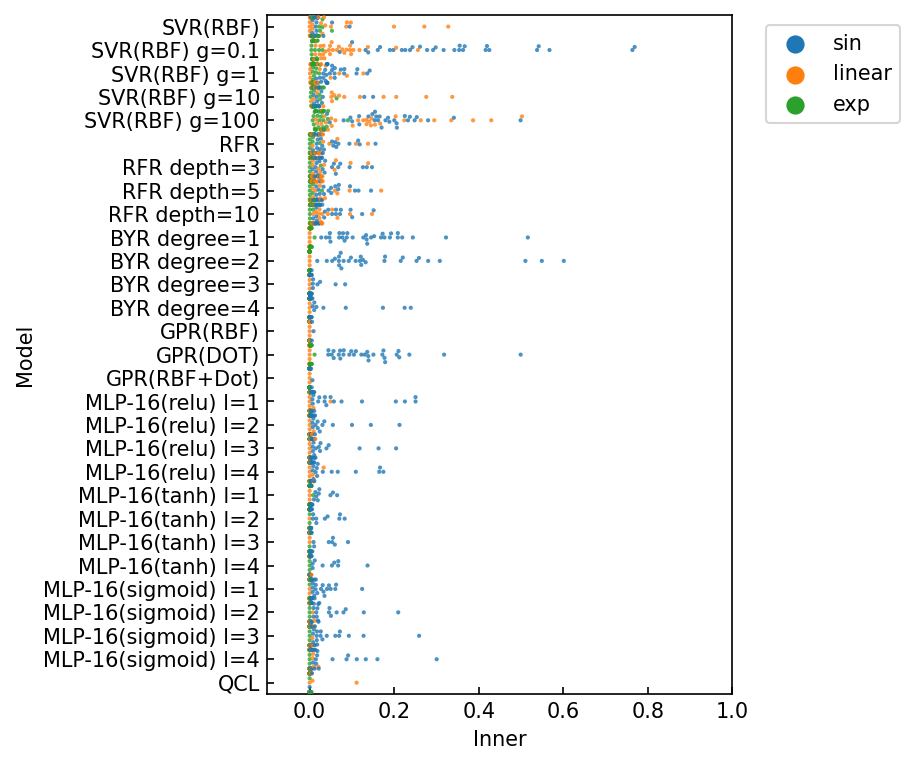

In [81]:
import pandas as pd
import seaborn as sns

df=pd.DataFrame.from_dict(res_dict).T

plt.figure(figsize=(4,6),dpi=150)
#ax=sns.swarmplot(data=df,y="Model",x="Inner",hue="Mode",alpha=0.8)
ax=sns.swarmplot(data=df,y="Model",x="Extra",hue="Mode",alpha=0.8,size=2)
ax.set_xlim(-0.1,1)
#ax.set(xscale="log")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.figure(figsize=(4,6),dpi=150)
ax=sns.swarmplot(data=df,y="Model",x="Inner",hue="Mode",alpha=0.8,size=2)
ax.set_xlim(-0.1,1)
#ax.set(xscale="log")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')





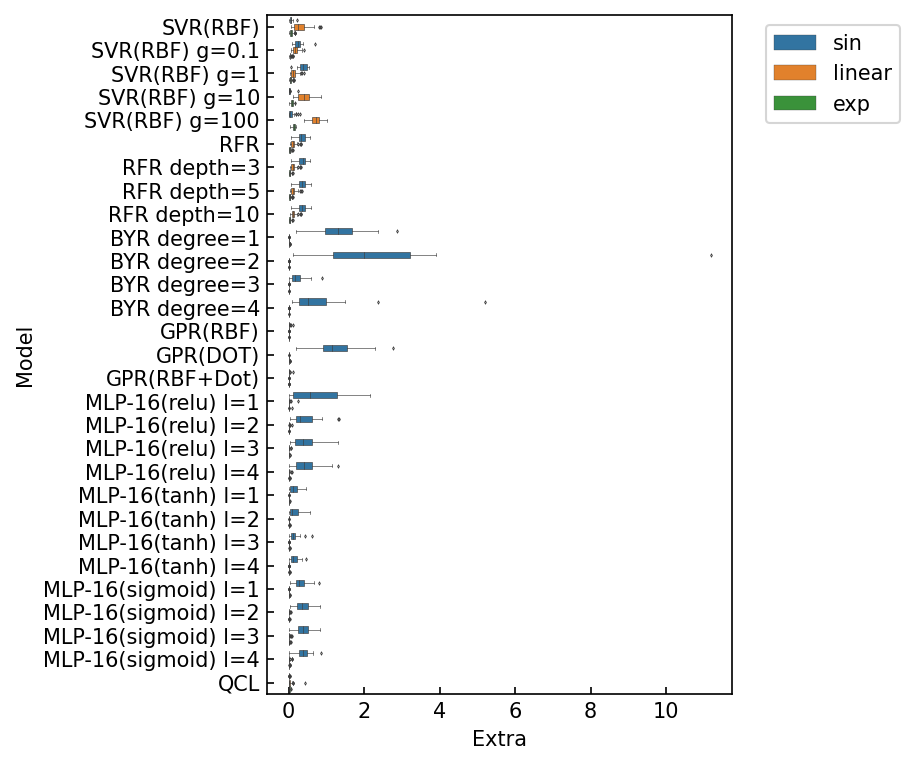

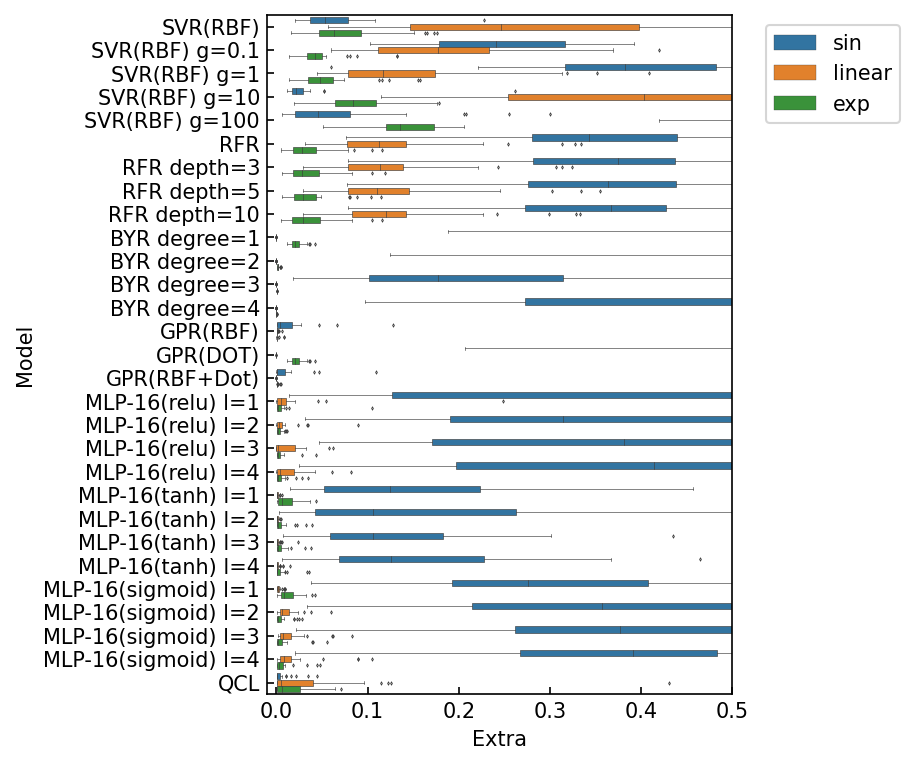

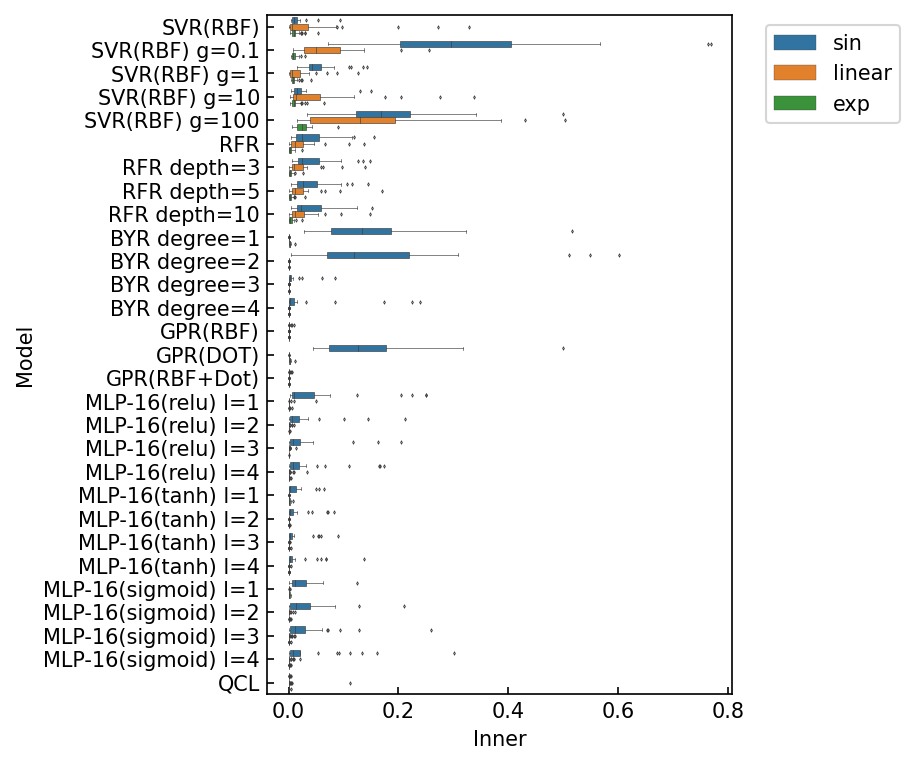

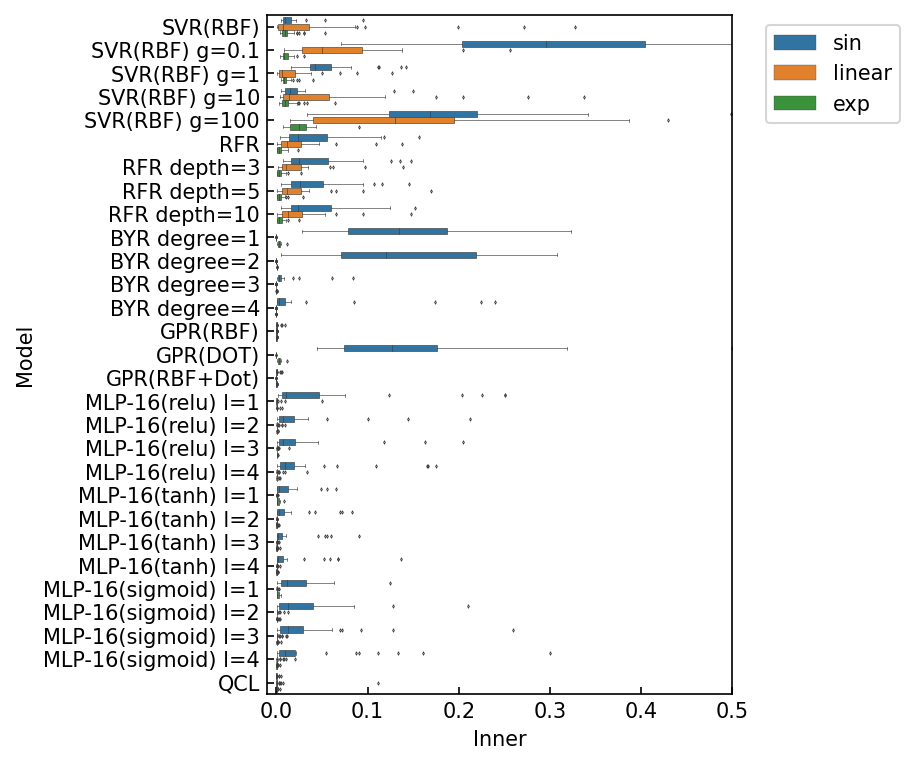

In [82]:
#extra

for m in ["Extra","Inner"]:
    for i in range(2):

        plt.figure(figsize=(4,6),dpi=150)
        ax=sns.boxplot(data=df,y="Model",x=m,hue="Mode",fliersize=0.2,linewidth=0.3)
        plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

        if i==1:
            ax.set_xlim(-0.01,0.5)



In [83]:
df.groupby(by=["Model","Mode"]).mean()#.sort_values(by="Extra")

Extra         Inner
Model          Mode                              
BYR degree=1   exp     2.153738e-02  2.786846e-03
               linear  2.048715e-14  7.798810e-15
               sin     1.345033e+00  1.439101e-01
BYR degree=2   exp     1.595476e-03  1.053799e-04
               linear  2.006745e-12  4.291044e-13
...                             ...           ...
SVR(RBF) g=10  linear  4.199176e-01  5.588373e-02
               sin     3.167453e-02  2.357326e-02
SVR(RBF) g=100 exp     1.410264e-01  2.575149e-02
               linear  7.317818e-01  1.476521e-01
               sin     7.119656e-02  1.789363e-01

[87 rows x 2 columns]

In [84]:
summary_df=df.groupby(by=["Model"]).mean()#.sort_values(by="Extra")
summary_df.columns=["Extra (all)","Inner (all)"]
summary_df["Total"]=summary_df["Extra (all)"]+summary_df["Inner (all)"]

for mode in ["linear","sin","exp"]:
    summary_df[f"Extra ({mode})"]=df[df["Mode"]==mode].groupby(by="Model").mean()["Extra"]
    summary_df[f"Inner ({mode})"]=df[df["Mode"]==mode].groupby(by="Model").mean()["Inner"]

summary_df.sort_values(by="Total").style.format("{:.2}").background_gradient(axis=0,high=0.5)

,Extra (all),Inner (all),Total,Extra (linear),Inner (linear),Extra (sin),Inner (sin),Extra (exp),Inner (exp)
Model,,,,,,,,,
GPR(RBF+Dot),0.0034,0.00018,0.0036,3.3e-11,1.2e-11,0.0096,0.00052,0.00069,2.3e-05
GPR(RBF),0.0053,0.00027,0.0056,0.00063,6.9e-05,0.014,0.0007,0.0011,4e-05
QCL,0.02,0.0018,0.022,0.039,0.0045,0.0052,0.00037,0.017,0.00043
MLP-16(tanh) l=3,0.049,0.0042,0.054,0.002,0.00027,0.14,0.012,0.0054,0.00029
MLP-16(tanh) l=1,0.054,0.004,0.058,0.0011,0.00012,0.15,0.011,0.011,0.0013
MLP-16(tanh) l=4,0.053,0.0054,0.059,0.002,0.00031,0.15,0.016,0.0046,0.00021
MLP-16(tanh) l=2,0.054,0.0044,0.059,0.00097,9.3e-05,0.16,0.013,0.0059,0.0003
BYR degree=3,0.08,0.0029,0.083,8.3e-11,7.5e-12,0.24,0.0086,0.0001,3.3e-06
MLP-16(sigmoid) l=1,0.11,0.0079,0.12,0.0027,0.0003,0.32,0.022,0.012,0.0013


In [85]:
df[df["Mode"]==mode].groupby(by="Model").mean()

,Extra,Inner
Model,,
BYR degree=1,0.021537,2.786846e-03
BYR degree=2,0.001595,1.053799e-04
BYR degree=3,0.000101,3.313445e-06
BYR degree=4,0.000017,2.583871e-07
GPR(DOT),0.021652,2.791863e-03
GPR(RBF),0.001097,4.046963e-05
GPR(RBF+Dot),0.000687,2.293793e-05
MLP-16(relu) l=1,0.006585,4.836404e-04
MLP-16(relu) l=2,0.003122,2.572905e-04
